# Lets solve quantum mechanics problems using np.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import expm, sinm, cosm

## no detuning

In [25]:
ω = 1
δ = 0
H=np.array([[ω,δ],[δ,-ω]])
H

array([[ 1,  0],
       [ 0, -1]])

In [71]:
σ_x=np.array([[0,1],[1,0]])
σ_y=np.array([[0,-1j],[1j,0]])
σ_z=np.array([[1,0],[0,-1]])

In [26]:
t_list = np.linspace(0,10,100)

In [27]:
U = [expm(-(1j)*t*H) for t in t_list]

In [28]:
v=np.array([1,1])/np.sqrt(2)

In [29]:
len(U)

100

In [30]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    expec_gs[i]=np.real(v.T.conj().dot(U[i].dot(v)))


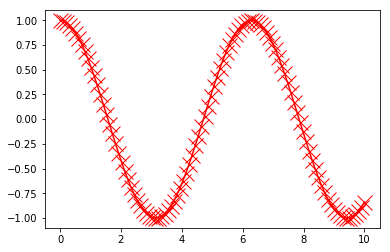

In [41]:
plt.plot(t_list,expec_gs,'rx-',markersize=15)

## Finite detuning

In [51]:
ω = 1
δ = 1
H=np.array([[ω,δ],[δ,-ω]])
np.linalg.eig(H)[0]

array([ 1.41421356, -1.41421356])

In [52]:
np.sqrt(ω**2+δ**2)

1.4142135623730951

In [53]:
U = [expm(-(1j)*t*H) for t in t_list]

In [54]:
v=np.array([0,1])

In [55]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    expec_gs[i]=np.real(v.T.conj().dot(U[i].dot(v)))


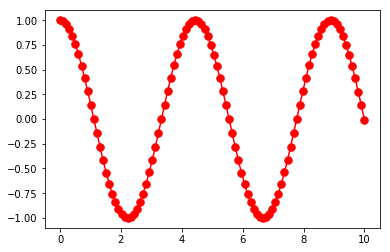

In [56]:
plt.plot(t_list,expec_gs,'r.-',markersize=15)

## Two Qubits

Partial trace is complicated, so lets first do things with kron.

In [77]:
H2=np.kron(σ_x,σ_x)

In [78]:
H2

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [79]:
U = [expm(-(1j)*t*H2) for t in t_list]

In [96]:
down=np.array([0,1])
up=np.array([1,0])
v2=(np.kron(down,down)+np.kron(up,up))/np.sqrt(2)
v2

array([ 0.70710678,  0.        ,  0.        ,  0.70710678])

In [97]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    expec_gs[i]=np.real(v2.T.conj().dot(U[i].dot(v2)))


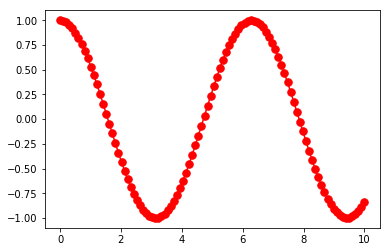

In [98]:
plt.plot(t_list,expec_gs,'r.-',markersize=15)

# Operator Expectation Values

In [99]:
Sx=np.kron(σ_x,np.eye(2))

In [100]:
Sx

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [101]:
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    v2p = U[i].dot(v2)
    expec_gs[i]=np.real(v2p.T.conj().dot(Sx.dot(v2p)))


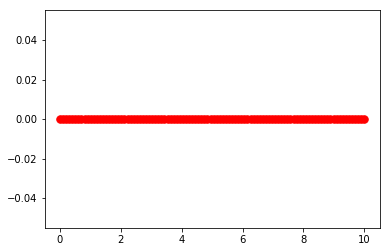

In [103]:
plt.plot(t_list,expec_gs,'r.-',markersize=15)

In [105]:
expec_gs

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

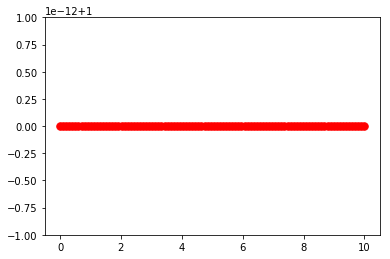

In [107]:
A=np.kron(σ_x,σ_x)
expec_gs=np.zeros(len(U))
for i in range(len(U)):
    v2p = U[i].dot(v2)
    expec_gs[i]=np.real(v2p.T.conj().dot(A.dot(v2p)))
    
plt.plot(t_list,expec_gs,'r.-',markersize=15)